### Get textblob

[textblob](https://pypi.python.org/pypi/textblob) is an external library that is neither included as part of the Python Standard Library nor with the tools that Anaconda bundles together.  We'll need to go to the commandline/command prompt and either use `conda install textblob` _or_ `pip install textblob`.  pip is the better option since it is more likely to actually work.  This side-step further underscores the importance of the command line.

### Functioning textblob example

In [50]:
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

# This next line takes the content of 'text' and passes it as input to the the TextBlob
# function.  
blob = TextBlob(text)

# print(blob.tags)           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

# print(blob.noun_phrases)   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity) # Should return 0.060
    print(sentence.sentiment.index) # Should return # -0.341

0.06000000000000001
<built-in method index of Sentiment object at 0x10f170480>
-0.34166666666666673
<built-in method index of Sentiment object at 0x10fb36bd0>


### Fully functioning sentiment analysis tool

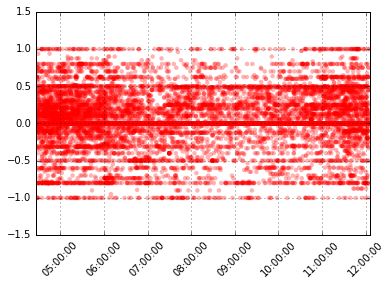

In [88]:
from datetime import datetime, timezone, timedelta
from textblob import TextBlob
import json
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import rand
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '…']

#Instantiate a text pre-processor
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

fname = 'trumpStream.json'
each_tweet=[]

#drawing on http://www.saltycrane.com/blog/2008/06/how-to-get-current-date-and-time-in/
#drawing on http://stackoverflow.com/questions/796008/cant-subtract-offset-naive-and-offset-aware-datetimes
datemin = datetime.now(timezone.utc)
datemax = datetime.now(timezone.utc)

with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        # print(tweet['text'])
        each_tweet.append([tweet['created_at'],tweet['text']])
        # print(each_tweet)
    points=[]
    for tweet_deets in each_tweet:
        #print(tweet_text)
        blob = TextBlob(tweet_deets[1])
        #print(blob)
        #print(tweet_deets[0][:50], " : ", blob.sentiment.polarity)
        #Time directives taken from https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
        #Date conversion from http://stackoverflow.com/questions/2265357/parse-date-string-and-change-format
        tweet_date = datetime.strptime(tweet_deets[0], '%a %b %d %H:%M:%S %z %Y')
        #print(type(tweet_date),tweet_date)
        if tweet_date > datemax: datemax = tweet_date
        if tweet_date < datemin: datemin = tweet_date
        points.append([tweet_date,blob.sentiment.polarity])
        #print(tweet_date)
    
    plt.scatter([item[0] for item in points] , [item[1] for item in points], c='red', alpha=0.3, edgecolors='none')

# Drawing on http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html 
# Also drawing on http://matplotlib.org/examples/pylab_examples/date_demo_rrule.html

plt.xlim(datemin - timedelta(days=0.001),datemax + timedelta(days=0.001))
plt.xticks(rotation='45')
plt.grid(True)

plt.show()

### matplotlib scatterplot example

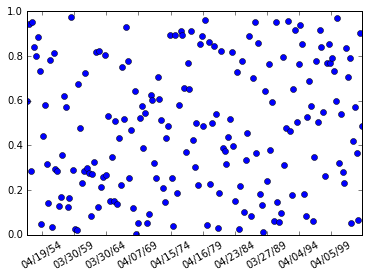

In [52]:
#!/usr/bin/env python
"""
Show how to use an rrule instance to make a custom date ticker - here
we put a tick mark on every 5th easter

See https://moin.conectiva.com.br/DateUtil for help with rrules
"""
import matplotlib.pyplot as plt
from matplotlib.dates import YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange
import numpy as np
import datetime

# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  # make up some random y values


fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()

In [81]:
### datetime library examples

In [83]:
#from http://www.saltycrane.com/blog/2008/06/how-to-get-current-date-and-time-in/
import datetime

now = datetime.datetime.now()


print ("Current date and time using str method of datetime object:")
print (str(now))

"""
print
print "Current date and time using instance attributes:"
print "Current year: %d" % now.year
print "Current month: %d" % now.month
print "Current day: %d" % now.day
print "Current hour: %d" % now.hour
print "Current minute: %d" % now.minute
print "Current second: %d" % now.second
print "Current microsecond: %d" % now.microsecond

print
print "Current date and time using strftime:"
print now.strftime("%Y-%m-%d %H:%M")

print
print "Current date and time using isoformat:"
print now.isoformat()
"""

Current date and time using str method of datetime object:
2016-04-28 22:18:50.352005


'\nprint\nprint "Current date and time using instance attributes:"\nprint "Current year: %d" % now.year\nprint "Current month: %d" % now.month\nprint "Current day: %d" % now.day\nprint "Current hour: %d" % now.hour\nprint "Current minute: %d" % now.minute\nprint "Current second: %d" % now.second\nprint "Current microsecond: %d" % now.microsecond\n\nprint\nprint "Current date and time using strftime:"\nprint now.strftime("%Y-%m-%d %H:%M")\n\nprint\nprint "Current date and time using isoformat:"\nprint now.isoformat()\n'